In [5]:
%matplotlib inline

In [6]:
import csv

import config as c
import pandas as pd
import numpy as np
import matplotlib
from collections import Counter
#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv(c.model_folder + 'features_all.csv')

In [8]:
df.columns

Index([u'key', u'number_of_flows', u'average_of_duration',
       u'standard_deviation_duration',
       u'percent_of_standard_deviation_duration', u'total_size_of_flows_orig',
       u'total_size_of_flows_resp', u'ratio_of_sizes',
       u'percent_of_established_states', u'inbound_pckts', u'outbound_pckts',
       u'periodicity_average', u'periodicity_standart_deviation', u'ssl_ratio',
       u'average_public_key', u'tls_version_ratio',
       u'average_of_certificate_length', u'standart_deviation_cert_length',
       u'is_valid_certificate_during_capture', u'amount_diff_certificates',
       u'number_of_domains_in_certificate', u'get_certificate_ratio',
       u'number_of_certificate_path', u'x509_ssl_ratio', u'SNI_ssl_ratio',
       u'self_signed_ratio', u'is_SNIs_in_SNA_dns', u'SNI_equal_DstIP',
       u'is_CNs_in_SNA_dns', u'ratio_of_differ_SNI_in_ssl_log',
       u'ratio_of_differ_subject_in_ssl_log',
       u'ratio_of_differ_issuer_in_ssl_log',
       u'ratio_of_differ_subject_i

In [9]:
#print df.most_common
normal = df.loc[df['label'] == 'NORMAL']
malware = df.loc[df['label'] == 'MALWARE']

for f_name in normal:
    top_5_normal = normal[f_name].value_counts().head(5)
    top_5_malware = malware[f_name].value_counts().head(5)
    #print("Feature {}".format(f_name))
    #print("Normal: {}".format(top_5_normal.values))
    #print("Malware: {}".format(top_5_malware.plot()))

1    6327
2    1780
3     230
4     111
5      87
Name: number_unique_IP_addresses_in_response, dtype: int64


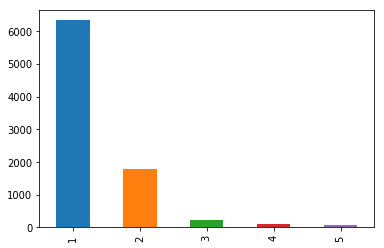

In [10]:
top_5_malware = malware["number_unique_IP_addresses_in_response"].value_counts().head(5)
print top_5_malware
top_5_malware.plot.bar()

In [12]:
print("Normal flows: " + str(len(normal)))
print("Botnet flows: " + str(len(malware)))
print("============")
print("Normal packets: " + str(normal['number_of_flows'].sum()))
print("Malware packets: " + str(malware['number_of_flows'].sum()))

Normal flows: 9222
Botnet flows: 9222
Normal packets: 92123
Malware packets: 94592


## Number of IPs in response

In [13]:
top_5 = df["number_unique_IP_addresses_in_response"].value_counts().head(5)
print(top_5)

1    8121
2    3006
3     907
4     665
6     451
Name: number_unique_IP_addresses_in_response, dtype: int64


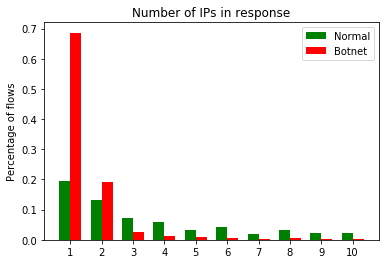

In [14]:
f_name = "number_unique_IP_addresses_in_response"
normal_percentage = list()
malware_percentage = list()
normals = df.loc[df['label'] == 'NORMAL']
malwares = df.loc[df['label'] == 'MALWARE']
normal_counts = normals[f_name].value_counts()
malware_counts = malwares[f_name].value_counts()

x_labels = range(1,10+1)
for i in x_labels:
    #print normal[i]
    #print malware[i]
    normal_percentage.append(normal_counts[i] / float(len(normals)))
    malware_percentage.append(malware_counts[i] / float(len(malwares)))
    

features_name = x_labels
features_names_simplified = features_name

N = len(features_name)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, normal_percentage, width, color='g')

rects2 = ax.bar(ind + width, malware_percentage, width, color='r')

# add some text for labels, title and axes ticks
ax.set_ylabel('Percentage of flows')
ax.set_title('Number of IPs in response')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(features_names_simplified)

ax.legend((rects1[0], rects2[0]), ('Normal', 'Botnet'))
fig.savefig(c.graphs_folder + "features_number_ips_in_response" + '.png')


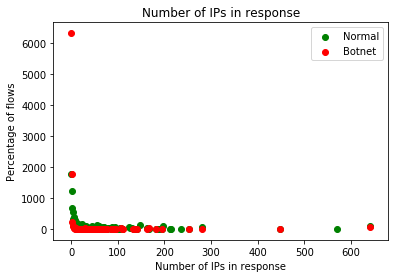

In [15]:
plt.clf()
plot1 = plt.scatter(normal_counts.index, normal_counts.values, c = 'green')
plot2 = plt.scatter(malware_counts.index, malware_counts.values, c = 'red')

plt.xlabel('Number of IPs in response')
plt.ylabel('Percentage of flows')
plt.legend([plot1, plot2], ['Normal', 'Botnet'])
plt.title('Number of IPs in response')
plt.savefig(c.graphs_folder + "features_number_ips_in_response_scatter" + '.png')

## Number of subdomains

<Figure size 432x288 with 0 Axes>

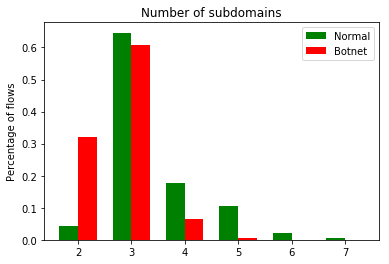

In [16]:
f_name = 'number_of_subdomains'

normal_percentage = list()
malware_percentage = list()
normals = df.loc[df['label'] == 'NORMAL']
malwares = df.loc[df['label'] == 'MALWARE']
normal_counts = normals[f_name].value_counts()
malware_counts = malwares[f_name].value_counts()
#print malware_counts

x_labels = range(2,8)
for i in x_labels:
    normal_percentage.append(normal_counts[i]/float(len(normals)))
    malware_percentage.append(malware_counts[i]/float(len(malwares)))

features_name = x_labels
features_names_simplified = features_name

N = len(features_name)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

plt.clf()
fig, ax = plt.subplots()
rects1 = ax.bar(ind, normal_percentage, width, color='g')

rects2 = ax.bar(ind + width, malware_percentage, width, color='r')

# add some text for labels, title and axes ticks
ax.set_ylabel('Percentage of flows')
ax.set_title('Number of subdomains')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(features_names_simplified)

ax.legend((rects1[0], rects2[0]), ('Normal', 'Botnet'))
plt.savefig(c.graphs_folder + "5_bar_" + f_name + '.png')

## length_of_longest_subdomain_name

<Figure size 432x288 with 0 Axes>

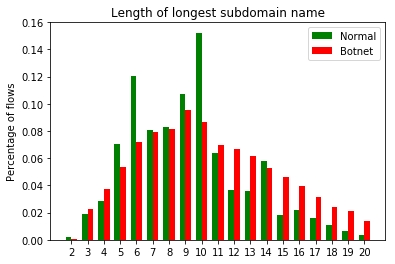

In [17]:
f_name = 'length_of_longest_subdomain_name'


normal_percentage = list()
malware_percentage = list()
normals = df.loc[df['label'] == 'NORMAL']
malwares = df.loc[df['label'] == 'MALWARE']
normal_counts = normals[f_name].value_counts()
malware_counts = malwares[f_name].value_counts()
#print malware_counts
#print normal_counts

x_labels = range(2,21)
for i in x_labels:
    normal_percentage.append(normal_counts[i]/float(len(normals)))
    malware_percentage.append(malware_counts[i]/float(len(malwares)))

features_name = x_labels
features_names_simplified = features_name

N = len(features_name)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

plt.clf()
fig, ax = plt.subplots()
rects1 = ax.bar(ind, normal_percentage, width, color='g')

rects2 = ax.bar(ind + width, malware_percentage, width, color='r')

# add some text for labels, title and axes ticks
ax.set_ylabel('Percentage of flows')
ax.set_title('Length of longest subdomain name')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(features_names_simplified)

ax.legend((rects1[0], rects2[0]), ('Normal', 'Botnet'))
plt.savefig(c.graphs_folder + "5_bar_" + f_name + '.png')

## TTLs

156
275
(-5000.0, 100000.0, -100.0, 1200.0)


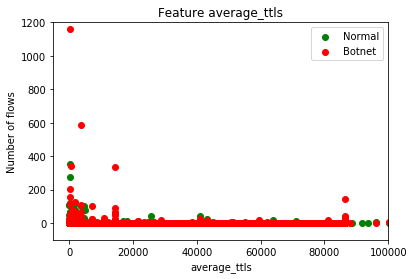

In [18]:
# u'average_ttls', u'std_ttls', u'min_ttls', u'max_ttls',
title = None
f_name = 'average_ttls'



normals = df.loc[df['label'] == 'NORMAL']
malwares = df.loc[df['label'] == 'MALWARE']
normal_counts = normals[f_name].value_counts()
malware_counts = malwares[f_name].value_counts()
print malware_counts[300]
print normal_counts[300]

plt.clf()
#ax1 = plt.subplot(131)
#plot1 = ax1.scatter(normal_counts.index, normal_counts.values, c = 'green')
#ax1.set_xlim([0, 100000])
#ax1.set_ylim([0, 5])

#ax2 = plt.subplot(132)
#plot2 = ax1.scatter(malware_counts.index, malware_counts.values, c = 'red')
#ax2.set_xlim([0, 100000])
#ax2.set_ylim([0, 5])

plot1 = plt.scatter(normal_counts.index, normal_counts.values, c = 'green')
plot2 = plt.scatter(malware_counts.index, malware_counts.values, c = 'red')

plt.axis([-5000,100000,-100,1200])
print plt.axis()
plt.xlabel(f_name)
plt.ylabel("Number of flows")
plt.legend([plot1, plot2], ['Normal', 'Botnet'])
plt.title(title if title is not None else "Feature " + f_name)
plt.savefig(c.graphs_folder + "scatter_" + f_name + '_zoom.png')
plt.show()

## Plot rectangles for all

In [19]:
def plot_rect(f_name, x_labels, title=None):
    normal_percentage = list()
    malware_percentage = list()
    normals = df.loc[df['label'] == 'NORMAL']
    malwares = df.loc[df['label'] == 'MALWARE']
    normal_counts = normals[f_name].value_counts()
    malware_counts = malwares[f_name].value_counts()

    for i in x_labels:
        normal_percentage.append(normal_counts[i]/float(len(normals)))
        malware_percentage.append(malware_counts[i]/float(len(malwares)))

    features_name = x_labels
    features_names_simplified = features_name

    N = len(features_name)

    ind = np.arange(N)  # the x locations for the groups
    width = 0.35       # the width of the bars

    plt.clf()
    fig, ax = plt.subplots()
    rects1 = ax.bar(ind, normal_percentage, width, color='g')

    rects2 = ax.bar(ind + width, malware_percentage, width, color='r')

    # add some text for labels, title and axes ticks
    ax.set_ylabel('Percentage of flows')
    ax.set_title(title if title is not None else f_name)
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels(features_names_simplified)

    ax.legend((rects1[0], rects2[0]), ('Normal', 'Botnet'))
    plt.savefig(c.graphs_folder + "rect_" + f_name +  + '.png')
    plt.show()

In [20]:
def scatter(f_name, title=None):
    normal = df.loc[df['label'] == 'NORMAL'][f_name].value_counts()
    malware = df.loc[df['label'] == 'MALWARE'][f_name].value_counts()

    plt.clf()
    plot1 = plt.scatter(normal.index, normal.values, c = 'green')
    plot2 = plt.scatter(malware.index, malware.values, c = 'red')

    plt.xlabel(f_name)
    plt.ylabel("Number of flows")
    plt.legend([plot1, plot2], ['Normal', 'Botnet'])
    plt.title(title if title is not None else "Feature " + f_name)
    plt.savefig(c.graphs_folder + "scatter_" + f_name + '.png')
    plt.show()

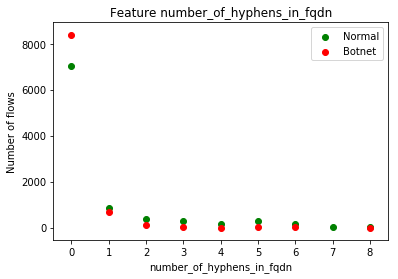

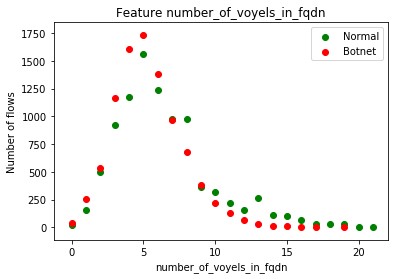

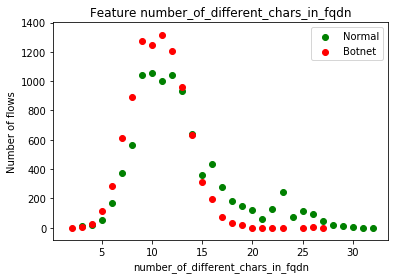

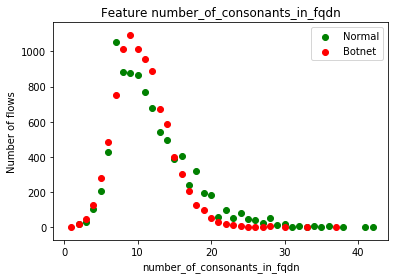

In [21]:
features = [
    u'number_of_hyphens_in_fqdn',
    u'number_of_voyels_in_fqdn',
    u'number_of_different_chars_in_fqdn',
    u'number_of_consonants_in_fqdn'
    ]

for f_name in features:
    scatter(f_name)

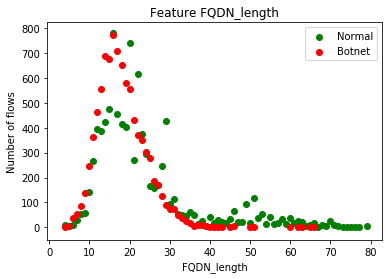

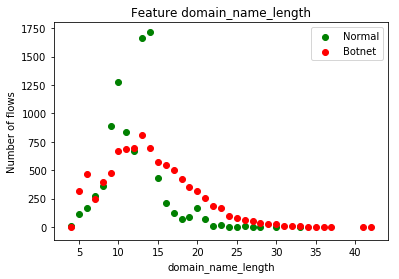

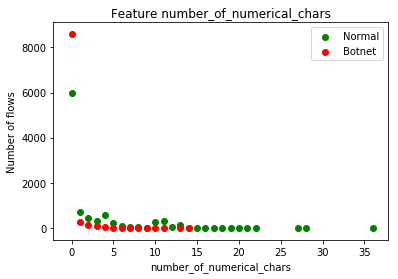

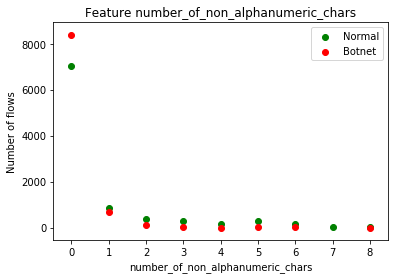

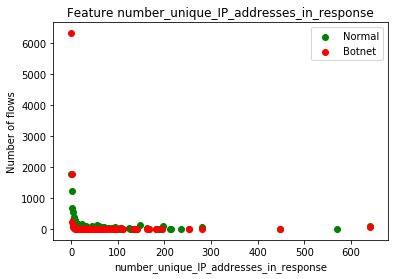

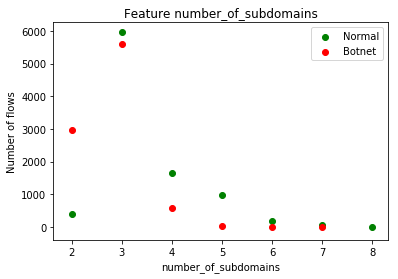

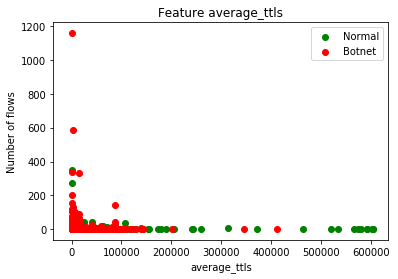

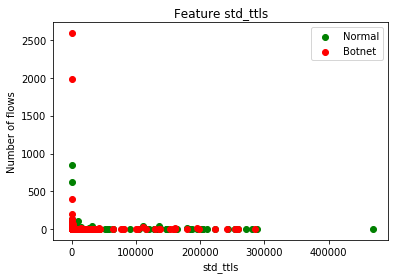

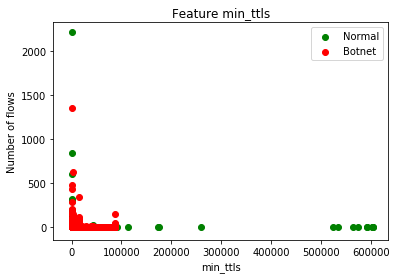

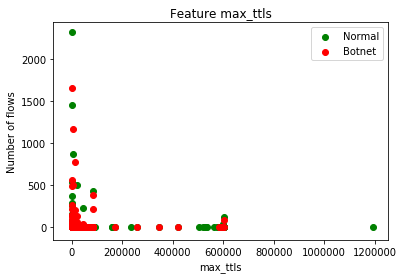

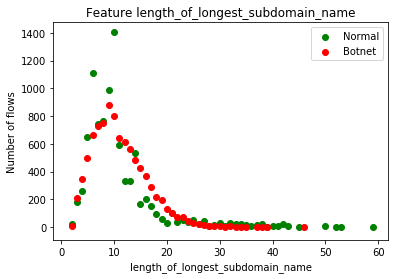

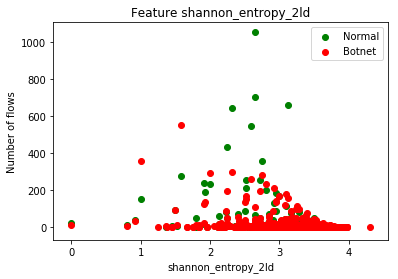

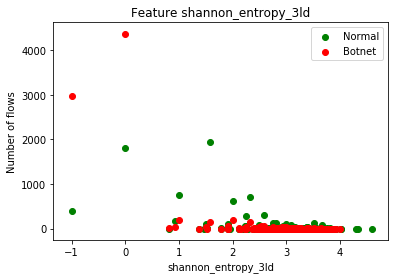

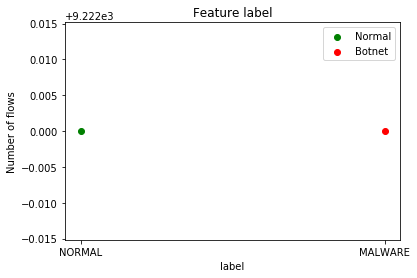

In [22]:
other_dns_features = [u'FQDN_length',
       u'domain_name_length', u'number_of_numerical_chars',
       u'number_of_non_alphanumeric_chars',
       u'number_unique_IP_addresses_in_response', u'number_of_subdomains',
       u'average_ttls', u'std_ttls', u'min_ttls', u'max_ttls',
       u'length_of_longest_subdomain_name',
       u'shannon_entropy_2ld',
       u'shannon_entropy_3ld', u'label']

for f_name in other_dns_features:
    scatter(f_name)